# Assignment 2 DLCVNLP (ANN ON FASHION MNIST DATASET)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# data splitting
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
x_train_full.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
# checking the datatype
x_train_full.dtype

dtype('uint8')

In [6]:
x_valid,x_train = x_train_full[:5000]/255.0,x_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [7]:
# we divided the values by 255 in order to scale the values

In [8]:
x_valid.shape

(5000, 28, 28)

In [9]:
y_valid.shape

(5000,)

In [10]:
x_train.shape

(55000, 28, 28)

In [11]:
y_train.shape

(55000,)

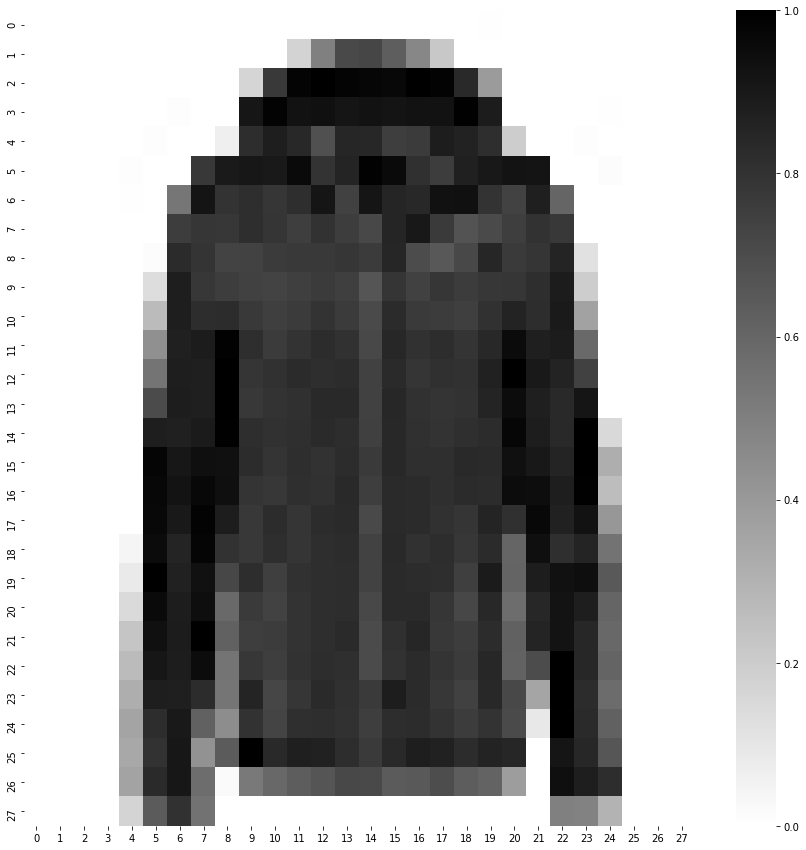

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],cmap='binary')

In [13]:
# now we will define the model 
model = tf.keras.models.Sequential()

In [14]:
# adding layers to the models
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation = "relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
#total trainable parameters
784*300 + 300 + 300*150 + 150 + 150*10 +10

282160

In [17]:
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [18]:
# creating callbacks
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs_for_ass2")
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model_mnistfashion.h5",save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience = 5,restore_best_weights=True)
callbacks = [tensorboard_cb,checkpoint_cb,early_stopping_cb]

In [19]:
history = model.fit(x_train,y_train,
                    epochs = 100,
                    validation_data =(x_valid,y_valid),
                    batch_size=32,           
                    callbacks = callbacks)

Epoch 1/100
   1/1719 [..............................] - ETA: 0s - loss: 2.3099 - accuracy: 0.2188WARNING:tensorflow:From E:\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7315 - accuracy: 0.7639 - val_loss: 0.5020 - val_accuracy: 0.8312
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4905 - accuracy: 0.8293 - val_loss: 0.4442 - val_accuracy: 0.8482
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4464 - accuracy: 0.8444 - val_loss: 0.4630 - val_accuracy: 0.8320
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4183 - accuracy: 0.8518 - val_loss: 0.3959 - val_accuracy: 0.8632
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/

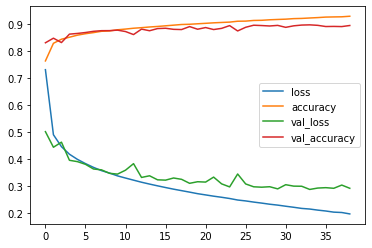

In [20]:
pd.DataFrame(history.history).plot()

In [21]:
# model saving
import time 
import os

def save_model(model_dir="Trained_model_fashion_mnist"):
    os.makedirs(model_dir,exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir,fileName)
    print(f"model {fileName} will be saved at {model_path}")
    return model_path

In [22]:
unique_path = save_model()

model Model_2021_05_29_23_59_52_.h5 will be saved at Trained_model_fashion_mnist\Model_2021_05_29_23_59_52_.h5


In [23]:
tf.keras.models.save_model(model,unique_path)

In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 60.7972 - accuracy: 0.8582


[60.79718780517578, 0.8582000136375427]

Actual Image Predicted


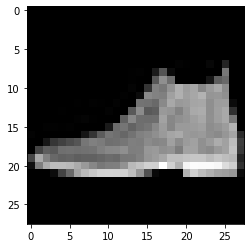

Actual Output Value = 9 
Actual Image Predicted


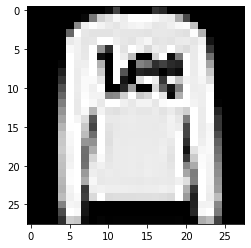

Actual Output Value = 2 
Actual Image Predicted


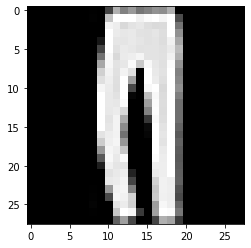

Actual Output Value = 1 
Actual Image Predicted


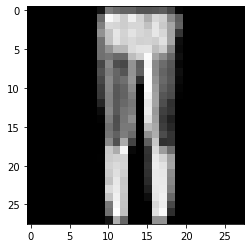

Actual Output Value = 1 
Actual Image Predicted


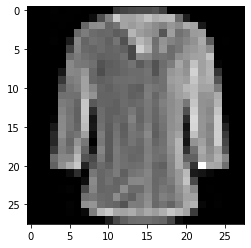

Actual Output Value = 6 
Actual Image Predicted


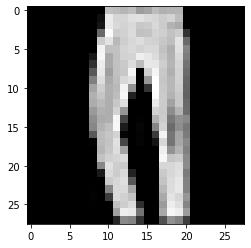

Actual Output Value = 1 
Actual Image Predicted


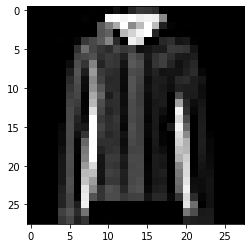

Actual Output Value = 4 
Actual Image Predicted


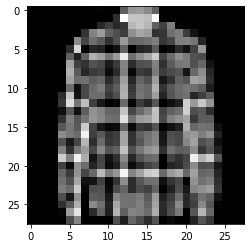

Actual Output Value = 6 
Actual Image Predicted


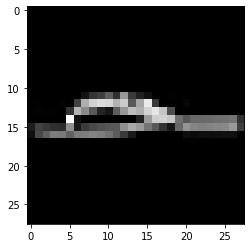

Actual Output Value = 5 
Actual Image Predicted


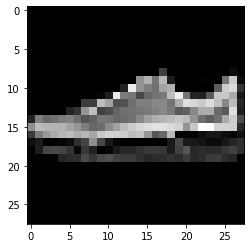

Actual Output Value = 7 


In [28]:
for i in range(0,10):
    print("Actual Image Predicted")
    plt.imshow(x_test[i],cmap='gray')
    plt.show()    
    print(f"Actual Output Value = {y_test[i]} ")

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot